In [1]:
# Python 3.11.5
import os
import openai
import pandas as pd
import time
from dotenv import load_dotenv
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
load_dotenv('/Users/sheng/Jupyter/3rd Seminar_Nov 12 25/Dataset/openai_key.env.txt')
openai.api_key = os.getenv("OPENAI_API_KEY")

# Copy and Paste your API Key within the single quotes
# openai.api_key = 'put_your_API_KEY_here'

In [3]:
def get_completion(prompt, model="ft:gpt-4.1-mini-2025-04-14:personal:missingvaluefilling:Bu2APnxE"):

    messages = [
        {"role": "system", "content": "Your task is to classify consumer hotel review into one of the following ratings: [\"1\", \"2\", \"3\", \"4\", \"5\"], where \"1\" indicates very dissatisfied and \"5\" indicates very satisfied."},
        {"role": "user", "content": prompt}
    ]
    response = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

## Test the test dataset: Value rating

In [4]:
df = pd.read_csv('/Users/sheng/Jupyter/3rd Seminar_Nov 12 25/Dataset/test_set.csv', index_col=0)

In [5]:
df.head()

,review_text,value_rating,room_rating,location_rating,service_rating
0,"Recently renovated, beautiful new updgrades. ...",5,4,5,5
1,"Great location, not cheap. If you like walking...",3,3,4,4
2,Rooms only ready at 10pm for check in. 1 room ...,1,1,5,1
3,My daughter and I came for New Years Eve and t...,4,4,5,5
4,Really bad experience on check-in. Front desk ...,2,2,4,2


In [6]:
# df['location_rating'].value_counts()
# df['room_rating'].value_counts()
# df['service_rating'].value_counts()
df['value_rating'].value_counts()

5    319
4    100
3     51
1     46
2     32
Name: value_rating, dtype: int64

## Test on test dataset - Value

In [7]:
# create a new feature generated from fine-tunied GPT4o mini
df['gpt41mini_Value'] = df['review_text'].apply(get_completion)

KeyboardInterrupt: 

In [ ]:
df.to_csv('Fine_tuning_VALUE_output.csv')

# Read the fine-tuned dataset and evaluate performance

In [8]:
df_output = pd.read_excel('GPT4o_fine_tuned_7 30 25.xlsx')

In [9]:
df_output.head()

,hotel_id,hotel_name,rating_avg,user_id,user_name,review_date,overall_rating,value_rating,room_rating,location_rating,service_rating,review_title,review_text,review_cnt,hotel_ranking,fine_tuned_value,fine_tuned_room,fine_tuned_location,fine_tuned_service
0,d93579,Park Lane Hotel NY,4.0,Minandmad,Minandmad,2023-01-06,5,5,4,5,5,Best Hotel for Central Park Views,"Recently renovated, beautiful new updgrades. ...",506,#207 of 501 hotels in New York City,5,5,5,5
1,d93579,Park Lane Hotel NY,4.0,elizabethjT4455YK,elizabethjT4455YK,2023-12-01,4,3,3,4,4,Central Park South,"Great location, not cheap. If you like walking...",506,#207 of 501 hotels in New York City,3,3,5,4
2,d93579,Park Lane Hotel NY,4.0,JUlia76_12,JUlia76_12,2023-01-13,1,1,1,5,1,Backpackers with a view,Rooms only ready at 10pm for check in. 1 room ...,521,#206 of 502 hotels in New York City,2,1,4,1
3,d93579,Park Lane Hotel NY,4.0,MountainMama2024,MountainMama2024,2023-01-09,5,4,4,5,5,Fabulous place! Great location. Friendly staff.,My daughter and I came for New Years Eve and t...,521,#206 of 502 hotels in New York City,4,5,5,5
4,d1485961,Hyatt Centric Wall Street New York,4.0,izhark282024,izhark282024,2023-01-06,2,2,2,4,2,Worst experience ever.,Really bad experience on check-in. Front desk ...,445,#317 of 501 hotels in New York City,2,2,3,1


In [10]:
y_true = df_output['value_rating']
y_pred = df_output['fine_tuned_value']

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.96      0.93      0.95        46
           2       0.88      0.88      0.88        32
           3       0.67      0.63      0.65        51
           4       0.53      0.62      0.57       100
           5       0.90      0.86      0.88       319

    accuracy                           0.80       548
   macro avg       0.78      0.78      0.78       548
weighted avg       0.81      0.80      0.80       548



In [11]:
y_true = df_output['room_rating']
y_pred = df_output['fine_tuned_room']

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        37
           2       0.73      0.89      0.80        27
           3       0.85      0.79      0.81        56
           4       0.85      0.56      0.67       102
           5       0.89      0.98      0.93       326

    accuracy                           0.87       548
   macro avg       0.84      0.82      0.82       548
weighted avg       0.87      0.87      0.86       548



In [12]:
y_true = df_output['location_rating']
y_pred = df_output['fine_tuned_location']

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.25      0.40         4
           2       0.40      0.40      0.40         5
           3       0.53      0.94      0.68        18
           4       0.47      0.70      0.56        73
           5       0.97      0.86      0.91       448

    accuracy                           0.84       548
   macro avg       0.67      0.63      0.59       548
weighted avg       0.88      0.84      0.85       548



In [13]:
y_true = df_output['service_rating']
y_pred = df_output['fine_tuned_service']

report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.78      0.92      0.84        38
           2       0.65      0.62      0.63        21
           3       0.76      0.64      0.69        44
           4       0.47      0.73      0.57        63
           5       0.95      0.87      0.91       382

    accuracy                           0.83       548
   macro avg       0.72      0.76      0.73       548
weighted avg       0.86      0.83      0.84       548



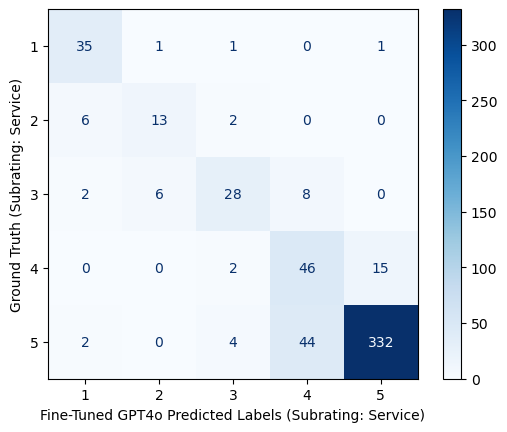

In [14]:
cm = confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])

disp.plot(cmap='Blues')
plt.xlabel("Fine-Tuned GPT4o Predicted Labels (Subrating: Service)")
plt.ylabel("Ground Truth (Subrating: Service)")
plt.show()